In [1]:
import glob, os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shutil
%matplotlib notebook
from main import *

In [2]:
#Extracting the SS coverages previously saved and extracted from kMC files
ss_COVG_NONLAT = pd.read_csv('SS_Covg_nonLat.csv')
ss_COVG_LAT = pd.read_csv('SS_Covg_Lat.csv')

In [3]:
#Isolating pressures and ss coverages
Prs_non_lat = ss_COVG_NONLAT.iloc[:,0].to_numpy()
Prs_lat = ss_COVG_LAT.iloc[:,0].to_numpy()
ss_covg_non_lat = ss_COVG_NONLAT.iloc[:,1].to_numpy()
ss_covg_lat = ss_COVG_LAT.iloc[:,1].to_numpy()

In [4]:
#Simulation times from each kMC simulation
t0,tf = 0,750.000000000102

In [5]:
%%time
#Performing SS MIKI MKM simulations for non lateral case
from main import *
MKM = MKModel('Atomic.csv','Stoich.csv','Param.csv')
MKM.Thermo_Constraint = 'OFF'
MKM.set_limits_of_integration(t0,tf)
MKM.rate_const_correction='None'
MKM_SS_covg_NONLAT = []
Prs = Prs_non_lat
for i in np.arange(len(Prs)):
    MKM.set_rxnconditions(Pr=[Prs[i]])
    MKM_SS_covg_NONLAT = np.append(MKM_SS_covg_NONLAT,MKM.get_SS_coverages(print_warning=False)[0])

Mass is conserved. 

CPU times: user 2.77 s, sys: 15.2 ms, total: 2.78 s
Wall time: 9.36 s


<IPython.core.display.Javascript object>


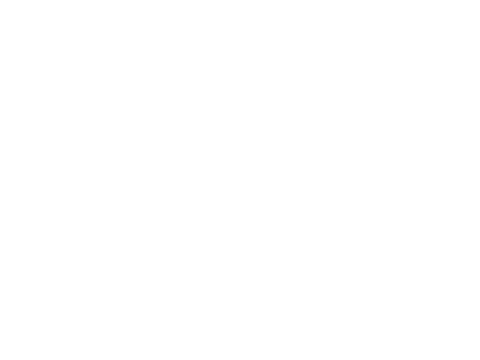

In [6]:
plt.figure()
plt.semilogx(Prs_lat,ss_covg_lat,'o',label='kMC (With lateral interaction)')
plt.semilogx(Prs_non_lat,ss_covg_non_lat,'*',label='kMC (No lateral interaction)')
plt.semilogx(Prs_non_lat,MKM_SS_covg_NONLAT,'-',label='MKM isotherm')
# plt.semilogx(Prs,MKM_SS_covg_LAT,'-',label='MKM isotherm')
plt.legend()
plt.title('CO adsorption_desorption isotherm')
plt.xlabel('Pressure, [bar]')
plt.ylabel('CO Coverage, [ML]')
plt.show()

# FUNCITON USED
$P = 0.255 e^{- 1.12 e^{- \frac{\theta}{\theta + 0.0414} - \frac{e^{\theta}}{\theta} + \frac{1}{\theta}}}$

In [7]:
y_sr_fit = np.array([ 4.85792672e+08,  9.99406080e+07,  1.29658210e+07,  7.82519500e+05,
        9.10060375e+05,  6.95730312e+05,  5.19318125e+05,  4.11955094e+05,
        3.26331906e+05,  2.56997156e+05,  1.92406922e+05, -6.20910205e+03,
       -6.03781641e+04, -1.01757836e+05, -1.38412891e+05, -1.56698266e+05,
       -1.64443547e+05, -1.72300891e+05, -1.84961453e+05, -1.92594562e+05,
       -1.96033578e+05, -2.05232922e+05, -2.06481109e+05, -2.09918297e+05,
       -2.10703031e+05, -2.15721359e+05, -2.19057078e+05, -2.22179750e+05])

In [8]:
x_sr = np.array([[0.04632962],
       [0.09111097],
       [0.12199639],
       [0.14321615],
       [0.15542546],
       [0.16332516],
       [0.17038888],
       [0.17540673],
       [0.18001615],
       [0.18429133],
       [0.18885611],
       [0.20898624],
       [0.21740851],
       [0.22547927],
       [0.23441984],
       [0.2397746 ],
       [0.24227528],
       [0.24497761],
       [0.24973696],
       [0.25288743],
       [0.25438593],
       [0.25866748],
       [0.25928191],
       [0.26101916],
       [0.2614255 ],
       [0.2641146 ],
       [0.26599499],
       [0.26782851]])

Keq = MKM.k[0]/MKM.k[1]

In [9]:
Keq

1232142857.1428573

In [10]:
##Step 4-> Getting predicted _f(theta)
# f_theta_pred = y_sr_fit
# f_theta_pred = np.exp(0.03483852*(MKM_SS_covg_LAT**3))
# f_theta_pred = np.exp(-MKM_SS_covg_LAT)-np.exp(MKM_SS_covg_LAT)

##Step 4-> Getting predicted _f(theta)
Ki_lateral_pred = y_sr_fit

##Step6-> Calculating predicted theta
ML_theta_pred = []
for i in np.arange(len(Prs)):
    ML_theta_pred.append((Ki_lateral_pred[i]*Prs[i])/(1+(Ki_lateral_pred[i]*Prs[i])))

In [11]:
ss_covg_lat

array([0.04632962, 0.09111097, 0.12199639, 0.14321615, 0.15542546,
       0.16332516, 0.17038888, 0.17540673, 0.18001615, 0.18429133,
       0.18885611, 0.20898624, 0.21740851, 0.22547927, 0.23441984,
       0.2397746 , 0.24227528, 0.24497761, 0.24973696, 0.25288743,
       0.25438593, 0.25866748, 0.25928191, 0.26101916, 0.2614255 ,
       0.2641146 , 0.26599499, 0.26782851])

In [12]:
ML_theta_pred

[0.04632865508558093,
 0.09086000396123206,
 0.11477649509580423,
 0.07257297332038212,
 0.4764563397636056,
 0.9858302812987293,
 0.9999922976514817,
 0.9999951451254776,
 0.9999969356446082,
 0.9999984435649653,
 0.999998700672135,
 1.000026843034494,
 1.00000184025661,
 1.0000008189384213,
 1.000000481650938,
 1.0000003545385452]

In [13]:
ss_covg_lat

array([0.04632962, 0.09111097, 0.12199639, 0.14321615, 0.15542546,
       0.16332516, 0.17038888, 0.17540673, 0.18001615, 0.18429133,
       0.18885611, 0.20898624, 0.21740851, 0.22547927, 0.23441984,
       0.2397746 , 0.24227528, 0.24497761, 0.24973696, 0.25288743,
       0.25438593, 0.25866748, 0.25928191, 0.26101916, 0.2614255 ,
       0.2641146 , 0.26599499, 0.26782851])

In [14]:
Prs_lat

array([1.00e-10, 1.00e-09, 1.00e-08, 1.00e-07, 1.00e-06, 1.00e-05,
       1.00e-04, 5.00e-04, 2.00e-03, 5.00e-03, 1.00e-02, 1.25e-01,
       2.50e-01, 5.00e-01, 1.00e+00, 1.50e+00, 2.00e+00, 2.50e+00,
       3.50e+00, 4.50e+00, 6.00e+00, 7.50e+00, 9.00e+00, 1.05e+01,
       1.20e+01, 1.40e+01, 1.60e+01, 1.80e+01])

$P = 2.62 \cdot 10^{-12} \left(\theta - 0.128\right) e^{128. \theta}$

In [40]:
ML_P_pred = 2.62e-12*(ss_covg_lat - 0.128)* np.exp(128*ss_covg_lat) * (ss_covg_lat/(1-ss_covg_lat))

In [41]:
ML_P_pred

array([-3.91088844e-12, -1.12483625e-09, -1.32222802e-08,  6.09633033e-07,
        5.77288476e-06,  2.16808925e-05,  6.76060983e-05,  1.48851912e-04,
        3.04080098e-04,  5.85343848e-04,  1.16974741e-03,  2.32341782e-02,
        7.92673211e-02,  2.54454737e-01,  9.17603176e-01,  1.97016083e+00,
        2.81228733e+00,  4.12858084e+00,  8.10576291e+00,  1.26559920e+01,
        1.56392177e+01,  2.86051007e+01,  3.11908533e+01,  3.98318013e+01,
        4.21752204e+01,  6.15513711e+01,  8.01528472e+01,  1.03668285e+02])

In [42]:
len(ML_P_pred)

28

In [43]:
len(ss_covg_lat)

28

<IPython.core.display.Javascript object>


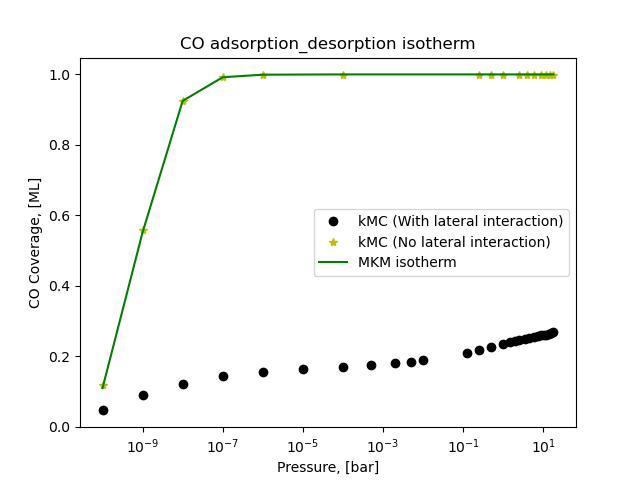

In [44]:
plt.figure()
# plt.semilogx(Prs_lat,ML_theta_pred,'-',label='ML lateral prediction (SR)')
plt.semilogx(Prs_lat,ss_covg_lat,'ko',label='kMC (With lateral interaction)')
plt.semilogx(Prs_non_lat,ss_covg_non_lat,'y*',label='kMC (No lateral interaction)')
plt.semilogx(Prs_non_lat,MKM_SS_covg_NONLAT,'g-',label='MKM isotherm')
# plt.semilogx(Prs,MKM_SS_covg_LAT,'-',label='MKM isotherm')
plt.legend()
plt.title('CO adsorption_desorption isotherm')
plt.xlabel('Pressure, [bar]')
plt.ylabel('CO Coverage, [ML]')
plt.show()

<IPython.core.display.Javascript object>


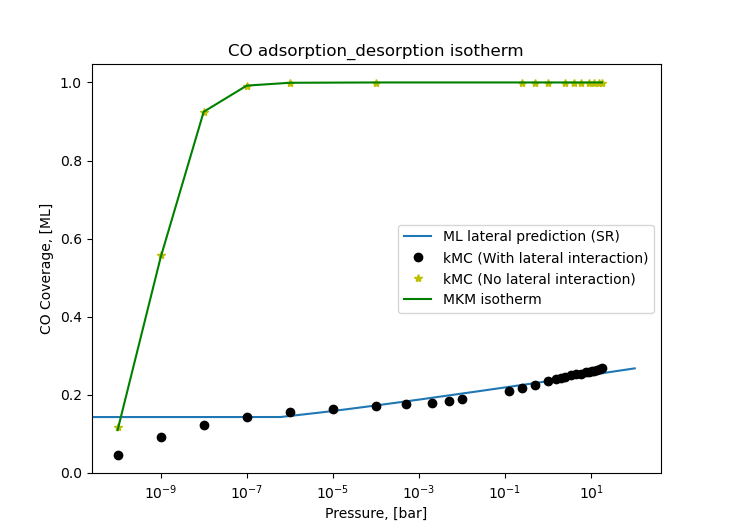

In [45]:
plt.figure()
plt.semilogx(ML_P_pred,ss_covg_lat,'-',label='ML lateral prediction (SR)')
plt.semilogx(Prs_lat,ss_covg_lat,'ko',label='kMC (With lateral interaction)')
plt.semilogx(Prs_non_lat,ss_covg_non_lat,'y*',label='kMC (No lateral interaction)')
plt.semilogx(Prs_non_lat,MKM_SS_covg_NONLAT,'g-',label='MKM isotherm')
# plt.semilogx(Prs,MKM_SS_covg_LAT,'-',label='MKM isotherm')
plt.legend()
plt.title('CO adsorption_desorption isotherm')
plt.xlabel('Pressure, [bar]')
plt.ylabel('CO Coverage, [ML]')
plt.show()

<IPython.core.display.Javascript object>


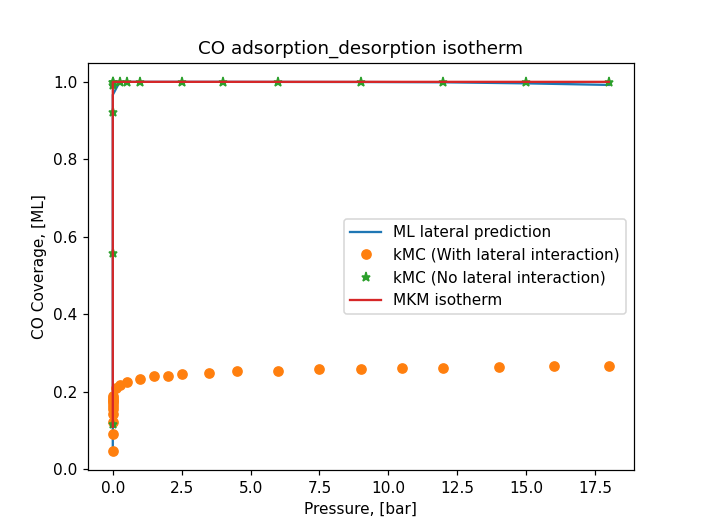

In [27]:
plt.figure()
plt.plot(Prs,ML_theta_pred,'-',label='ML lateral prediction')
plt.plot(Prs_lat,ss_covg_lat,'o',label='kMC (With lateral interaction)')
plt.plot(Prs_non_lat,ss_covg_non_lat,'*',label='kMC (No lateral interaction)')
plt.plot(Prs_non_lat,MKM_SS_covg_NONLAT,'-',label='MKM isotherm')
# plt.semilogx(Prs,MKM_SS_covg_LAT,'-',label='MKM isotherm')
plt.legend()
plt.title('CO adsorption_desorption isotherm')
plt.xlabel('Pressure, [bar]')
plt.ylabel('CO Coverage, [ML]')
plt.show()

In [15]:
import glob, os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shutil
%matplotlib notebook
from main import *

<IPython.core.display.Javascript object>


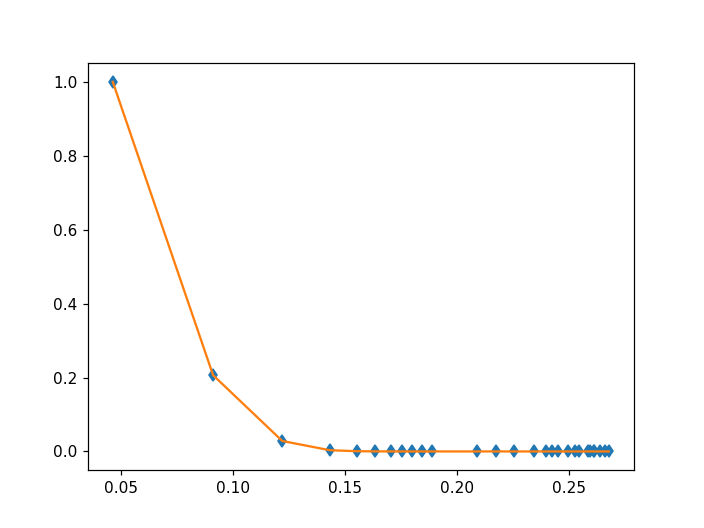

In [16]:
x = np.array([0.04632962, 0.09111097, 0.12199639, 0.14321615, 0.15542546,
       0.16332516, 0.17038888, 0.17540673, 0.18001615, 0.18429133,
       0.18885611, 0.20898624, 0.21740851, 0.22547927, 0.23441984,
       0.2397746 , 0.24227528, 0.24497761, 0.24973696, 0.25288743,
       0.25438593, 0.25866748, 0.25928191, 0.26101916, 0.2614255 ,
       0.2641146 , 0.26599499, 0.26782851])

y = np.array([1.00000000e+00, 2.06347596e-01, 2.86015974e-02, 3.44080697e-03,
       3.78811992e-04, 4.01823672e-05, 4.22767895e-06, 8.75699956e-07,
       2.25909945e-07, 9.29702603e-08, 4.78843402e-08, 4.30890890e-09,
       2.24556196e-09, 1.15668191e-09, 5.88461953e-10, 3.90989572e-10,
       2.87252126e-10, 2.25324512e-10, 1.53935363e-10, 1.13002462e-10,
       7.52166653e-11, 5.39328294e-11, 3.82279042e-11, 2.74129375e-11,
       1.88849995e-11, 1.09385754e-11, 4.79010078e-12, 0.00000000e+00])

y_fit = np.array([9.99837935e-01, 2.06364125e-01, 2.83358432e-02, 3.32273077e-03,
       6.20606239e-04, 1.66035956e-04, 4.22206431e-05, 1.40502198e-05,
       4.59652620e-06, 1.47226990e-06, 3.86689010e-07, 1.54492488e-10,
       1.67136552e-12, 8.35506184e-15, 5.81727670e-18, 3.11155200e-20,
       2.07320603e-21, 8.98376508e-23, 1.97058810e-25, 2.14766861e-27,
       2.16706480e-28, 1.75717739e-31, 5.87858142e-32, 2.38819787e-33,
       1.10261985e-33, 5.21906255e-36, 9.52439473e-38, 0.00000000e+00])

plt.figure()
plt.plot(x,y,'d')
plt.plot(x,y_fit,'-')

<IPython.core.display.Javascript object>


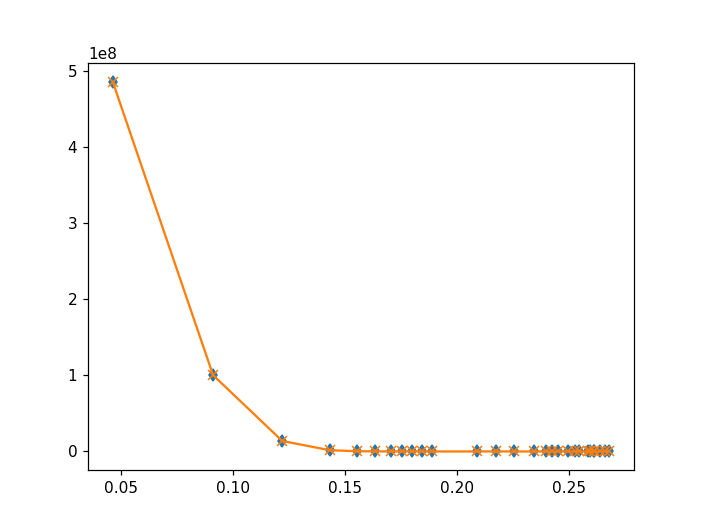

In [17]:
y_inv = np.array([4.85803232e+08, 1.00244329e+08, 1.38947485e+07, 1.67155517e+06,
       1.84028110e+05, 1.95207442e+04, 2.05384042e+03, 4.25438192e+02,
       1.09768104e+02, 4.51855752e+01, 2.32826895e+01, 2.11360411e+00,
       1.11122350e+00, 5.82242045e-01, 3.06198955e-01, 2.10266234e-01,
       1.59870247e-01, 1.29785612e-01, 9.51045326e-02, 7.52191971e-02,
       5.68627351e-02, 4.65229788e-02, 3.88934753e-02, 3.36395296e-02,
       2.94966297e-02, 2.56362312e-02, 2.26492824e-02, 2.03222359e-02])
y_fit_inv = np.array([4.8572451e+08, 1.0025236e+08, 1.3765644e+07, 1.6141934e+06,
       3.0149253e+05, 8.0660828e+04, 2.0510943e+04, 6.8256626e+03,
       2.2330276e+03, 7.1525378e+02, 1.8787509e+02, 9.5375180e-02,
       2.1134192e-02, 2.0326296e-02, 2.0322239e-02, 2.0322235e-02,
       2.0322235e-02, 2.0322235e-02, 2.0322235e-02, 2.0322235e-02,
       2.0322235e-02, 2.0322235e-02, 2.0322235e-02, 2.0322235e-02,
       2.0322235e-02, 2.0322235e-02, 2.0322235e-02, 2.0322235e-02])
plt.figure()
plt.plot(x,y_inv,'d')
plt.plot(x,y_fit_inv,'x-')